In [1]:
!pwd

/Users/macbook/divtel/SST


In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive, FloatSlider, interact, fixed
from divtel import *
import copy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
from astroplan import FixedTarget
#from . import utils
#from .const import COLORS
#from . import pointing

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

import healpy as hp
import tqdm

#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## LOAD CTA CONFIG

In [3]:
cta = CTA_Info('south')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2025-02-26T15:04:32.362


In [4]:
# Note that if the radius is in meters, 
# you can set LoadConfig(file, radius="meters")
# defalut is in degrees

array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)


## Check configuration table

In [5]:
array.table.units = "deg"
array.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [6]:
table=array.table

## Check the telescope spatial distribution
This is useful to pick the groups

In [7]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


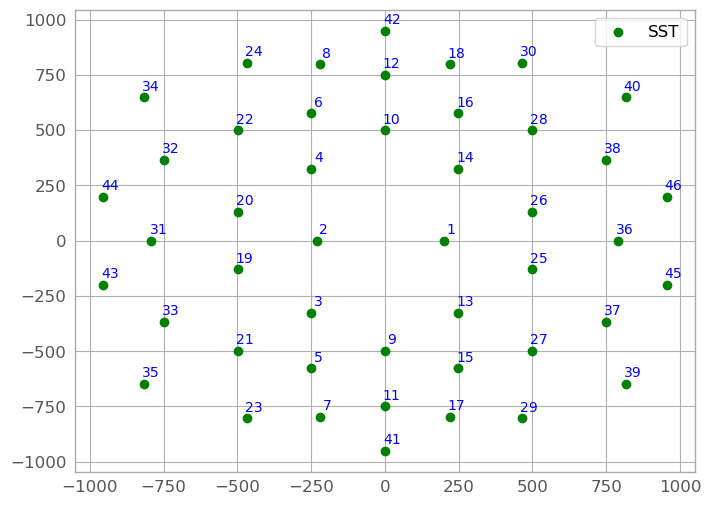

In [8]:
# Loop through all the telescopes
#for fov in array.table["fov"]:
#    print(fov)
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
for i in range(len(array.table)):
    plt.scatter(array.table['x'][i], array.table['y'][i], c=colors[i], label=fov_labels[colors[i]])

    # Annotate each point with the telescope ID
    #matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
#Annotate the point xy with text text.
#In the simplest form, the text is placed at xy.
    plt.annotate(str(array.table["id"][i]),
                 (array.table['x'][i], array.table['y'][i]),  # Point position
                 textcoords="offset points",  # Text position relative to the point
                 xytext=(5, 5),  # Offset in pixels (to avoid overlapping the point)
                 ha='center', fontsize=10, color='blue')
handles, labels = plt.gca().get_legend_handles_labels()
#handles, labels like this is doing
    #plt.gca() gets the current Axes object, which is where your plot is
    #.get_legend_handles_labels()
        #handles: Returns a list of the graphical elements (e.g., lines, scatter plot points) that would appear in the legend.
        # labels: Returns the text labels associated with each graphical element in handles

by_label = dict(zip(labels, handles))  # Remove duplicate labels, the dictionary by the structure takes out the double 
plt.legend(by_label.values(), by_label.keys())
#by_label.values This is pulling out the unique graphical elements
# by_label.keys  This is retrieving the unique text 
plt.savefig("./different_telescopes.png", dpi=300, bbox_inches="tight")
plt.show() 

## Check the hyper field of view (hFoV)

This is the whole telescope array hFoV maybe? (ask)

In [9]:
array.hFoV(m_cut=3) 

46it [00:06,  6.67it/s]


(62.238869377690584, 46.0)

In [10]:
#array.hFoV(m_cut=3)

## Grouping telescopes

In [11]:


sub_group_div = {'1':[24,12,30,42,8,18], 
             '2':[44,32,34],
              '3':[43,33,35],
              '4':[23,41,29,11,7,17],
              '5':[37,39,45],
              '6':[38,40,46],
              '7':[1,2,9,10],
              '8':[16,26,28],
              '9':[15,25,27],
              '10':[13,14,36],
              '11':[5,19,21],
              '12':[6,20,22],
              '13':[3,4,31]
            
    
}


In [12]:
def compute_center_of_gravity(group):
    x, y, z = group['x'], group['y'], group['z']
    cog_x = round(np.mean(x),2)
    cog_y = round(np.mean(y),2)
    cog_z = round(np.mean(z),2)
    return cog_x, cog_y, cog_z

# Function to create new telescope list with center of gravity
def create_new_group_list(tel_group):
    new_telescopes = []
    for group in tel_group.groups:
        print(tel_group.groups)
        print (group['focal'][0],round(group['radius'][0],2))
        #id_ = group["id"][0]
        cog = compute_center_of_gravity(group)
        focal, fov = group['focal'][0], round(group['radius'][0],2)  # Assuming same within a group
        new_telescopes.append([*cog, focal, fov])
    return new_telescopes


In [13]:
tel_group, labels, number_of_telescopes_subarray_1 =array.group_by(sub_group_div)

In [14]:
# Step 2: Create new telescope list with center of gravity
new_telescopes = create_new_group_list(tel_group)



<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45


In [15]:
# Define the file path where you want to save the output
output_file_path = './SST_best_config_div_conv_together.txt'

# Open the file in write mode
with open(output_file_path, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path}")


New telescope data has been written to ./SST_best_config_div_conv_together.txt


## MULTIPLE DIVERGENCES

SST configuration with two subarrays

In [16]:
array_SST_2_diff_div= LoadConfig('./SST_best_config_div_conv_together.txt', frame=cta, pointing2src=True)

In [17]:
array_SST_2_diff_div.table.units = "deg"
array_SST_2_diff_div.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.85
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,931.85
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.21
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.70
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.76
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.87
7,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,8.77
8,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.95


## Here I am trying to find the multiplicity for each subarray division 

In [18]:
 number_of_telescopes_subarray_1

[6, 3, 3, 6, 3, 3, 4, 3, 3, 3, 3, 3, 3]

In [19]:
table_SST_conv = []
table_SST= array_SST_2_diff_div.table
number_of_telescopes_config_SST_conv=[]
# Append the columns for LST so I know what to get or expect
table_SST_conv.append(table_SST['x'])
table_SST_conv.append(table_SST['y'])
table_SST_conv.append(table_SST['z'])
table_SST_conv.append(table_SST['focal'])
table_SST_conv.append(table_SST['radius'])
table_SST_conv.append(table_SST['fov'])

# Initialize sub_config and other variables
sub_config = []
telescopes = [1, 2,3,4,5,6]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Putting it tel-1 because the first column we had the index
    sub_config.append([col[tel - 1] for col in table_SST_conv])
    number_of_telescopes_config_SST_conv.append(number_of_telescopes_subarray_1[tel-1])


# Print the result for verification
print(sub_config)
print(number_of_telescopes_config_SST_conv)

[[0.0, 816.83, 21.83, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, 404.67, 16.75, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, -404.67, 55.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -816.83, 65.42, 5.6, 4.450000000000001, 62.46242685852285], [839.67, -404.67, 17.75, 5.6, 4.450000000000001, 62.46242685852285], [839.67, 404.67, 10.08, 5.6, 4.450000000000001, 62.46242685852285]]
[6, 3, 3, 6, 3, 3]


In [20]:
table_SST_div = []
table_SST= array_SST_2_diff_div.table
number_of_telescopes_config_SST_div=[]
# Append the columns for LST so I know what to get or expect
table_SST_div.append(table_SST['x'])
table_SST_div.append(table_SST['y'])
table_SST_div.append(table_SST['z'])
table_SST_div.append(table_SST['focal'])
table_SST_div.append(table_SST['radius'])
table_SST_div.append(table_SST['fov'])

# Initialize sub_config and other variables
sub_config_div= []
telescopes = [7,8,9,10,11,12,13]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config_div.append([col[tel - 1] for col in table_SST_div])
    number_of_telescopes_config_SST_div.append( number_of_telescopes_subarray_1[tel-1])


# Print the result for verification
print(sub_config_div)
print(number_of_telescopes_config_SST_div)

[[-7.75, 0.0, 22.5, 5.6, 4.450000000000001, 62.46242685852285], [415.67, 402.0, 12.42, 5.6, 4.450000000000001, 62.46242685852285], [415.67, -402.0, 27.92, 5.6, 4.450000000000001, 62.46242685852285], [429.33, 0.0, 16.08, 5.6, 4.450000000000001, 62.46242685852285], [-415.67, -402.0, 48.25, 5.6, 4.450000000000001, 62.46242685852285], [-415.67, 402.0, 15.58, 5.6, 4.450000000000001, 62.46242685852285], [-429.67, 0.0, 29.42, 5.6, 4.450000000000001, 62.46242685852285]]
[4, 3, 3, 3, 3, 3, 3]


In [21]:
print(sub_config)

[[0.0, 816.83, 21.83, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, 404.67, 16.75, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, -404.67, 55.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -816.83, 65.42, 5.6, 4.450000000000001, 62.46242685852285], [839.67, -404.67, 17.75, 5.6, 4.450000000000001, 62.46242685852285], [839.67, 404.67, 10.08, 5.6, 4.450000000000001, 62.46242685852285]]


In [22]:
# Define the file path where you want to save the output
output_file_path_3 = './best_config_SST_conv.txt'

# Open the file in write mode
with open(output_file_path_3, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_3}")
# Define the file path where you want to save the output


New telescope data has been written to ./best_config_SST_conv.txt


In [23]:
output_file_path_4 = './best_config_SST_div.txt'

# Open the file in write mode
with open(output_file_path_4, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config_div:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_4}")

New telescope data has been written to ./best_config_SST_div.txt


In [24]:
full_array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt",frame=cta)
complete_array= LoadConfig("/Users/macbook/divtel/SST/SST_best_config_div_conv_together.txt", frame=cta)
array_conv = LoadConfig("/Users/macbook/divtel/SST/best_config_SST_conv.txt",complete_array=complete_array, frame=cta)
array_div = LoadConfig("/Users/macbook/divtel/SST/best_config_SST_div.txt",complete_array=complete_array, frame=cta)

In [25]:
array_div.table.units='deg'
array_div.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,8.77
2,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.95
3,415.67,-402.0,27.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.74
4,429.33,0.0,16.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,430.16
5,-415.67,-402.0,48.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.14
6,-415.67,402.0,15.58,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,577.90
7,-429.67,0.0,29.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,429.00


In [26]:
complete_array.table.units='deg'
complete_array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.85
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,931.85
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.21
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.70
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.76
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.87
7,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,8.77
8,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.95


In [27]:
array_conv.table.units='deg'
array_conv.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.85
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,931.85
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.21
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.70
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.76
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.87


In [28]:
complete_array.table.units='deg'
complete_array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.85
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,931.85
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.21
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.70
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.76
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.87
7,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,8.77
8,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.95


In [29]:
full_array.table.units='deg'
full_array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


13it [00:01,  6.57it/s]
13it [00:01,  6.68it/s]


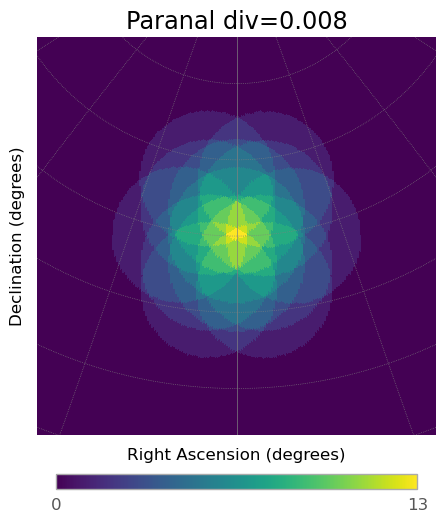

In [30]:
#complete_array.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=full_array, div1=0.008, div2=0.008, az=0, alt=70)
complete_array.divergent_pointing( div=0.008, az=0, alt=70)
complete_array.multiplicity_plot()



The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:06,  6.71it/s]
46it [00:06,  6.82it/s]


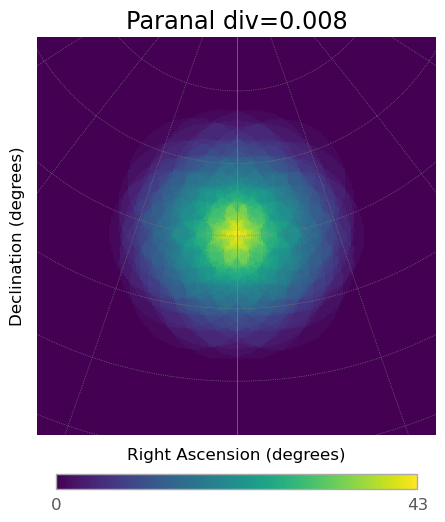

In [31]:
full_array.divergent_pointing(div=0.008,az=0, alt=70)
full_array.multiplicity_plot()


In [32]:
full_array.hFoV()

46it [00:06,  6.65it/s]


(239.4478541861046, 11.947532723588367)

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.222120825704168 rad
-0.0 rad
1.189082111560649 rad
-0.08547884876417715 rad
1.1895383811626927 rad
0.08547884876417715 rad
1.1894492050480268 rad
-0.0 rad
1.2521943898540595 rad
0.10376783219523598 rad
1.2513663579851608 rad
-0.10376783219523598 rad
1.2543966727348794 rad
-0.0 rad


6it [00:00,  6.56it/s]
7it [00:01,  4.82it/s]
6it [00:00,  6.43it/s]


10.386999382873206


7it [00:01,  6.60it/s]


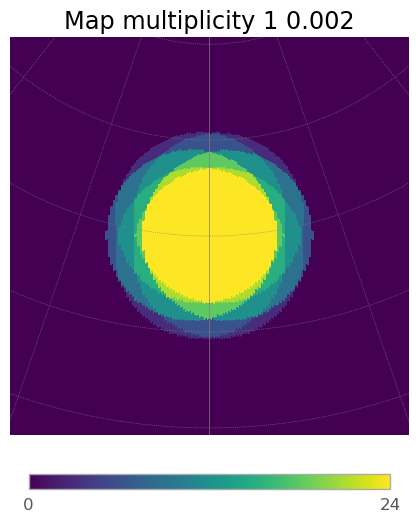

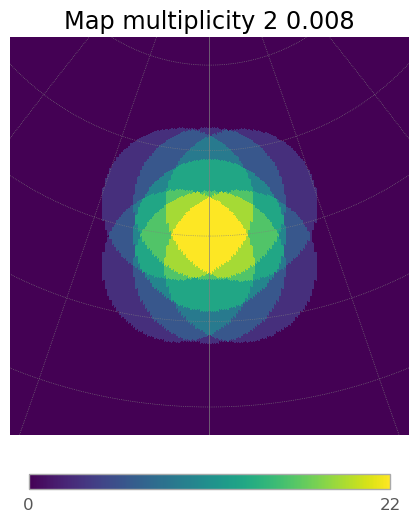

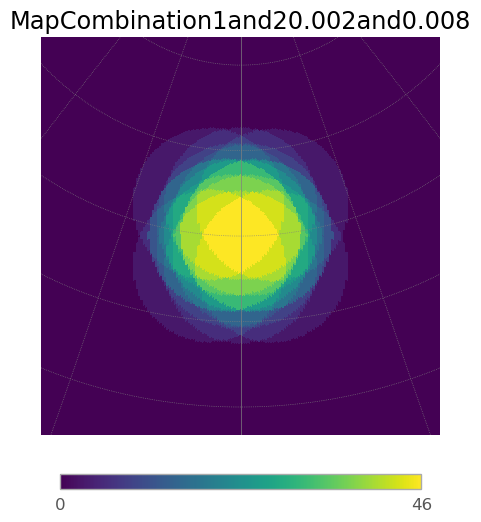

In [33]:
array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=0.002, div2=0.008, az=0, alt=70)
array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)


In [34]:
divergence_list=[0.0022, 0.0043, 0.008, 0.01135, 0.013]

The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:06,  6.62it/s]
46it [00:07,  6.50it/s]
46it [00:06,  6.79it/s]
46it [00:07,  6.27it/s]


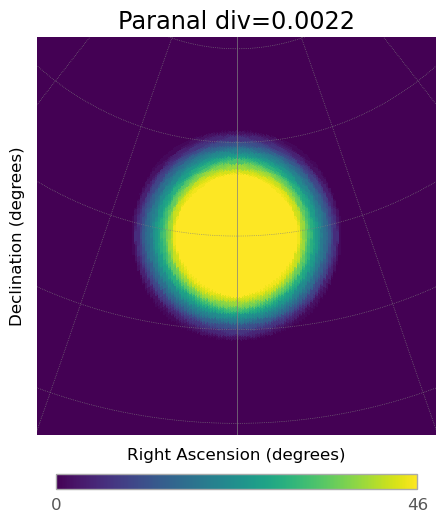

The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:07,  6.12it/s]
46it [00:06,  6.82it/s]
46it [00:07,  6.55it/s]
46it [00:07,  6.41it/s]


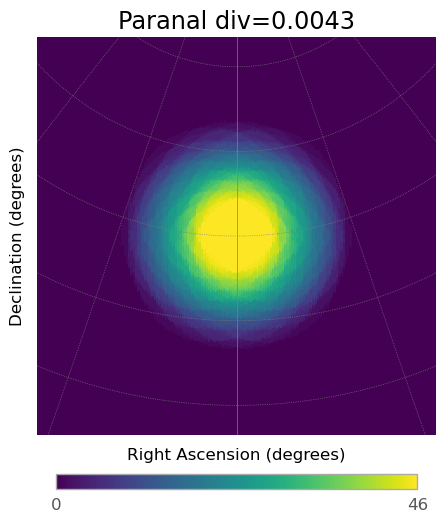

The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:07,  6.24it/s]
46it [00:07,  6.23it/s]
46it [00:06,  6.58it/s]
46it [00:06,  6.58it/s]


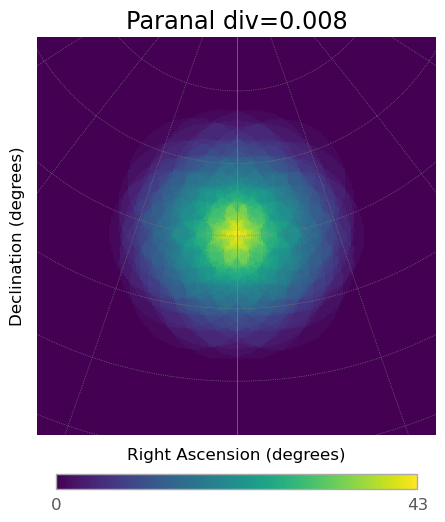

The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:07,  6.41it/s]
46it [00:06,  6.65it/s]
46it [00:06,  6.72it/s]
46it [00:06,  6.74it/s]


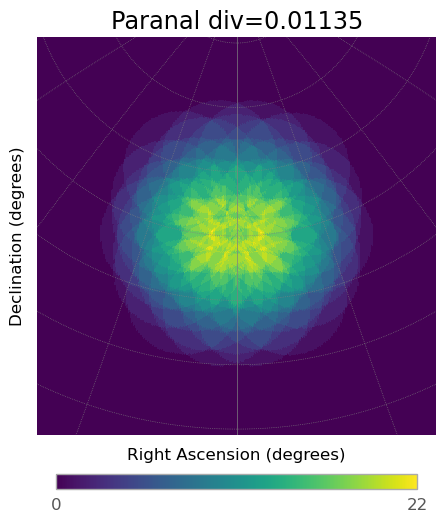

The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:06,  6.68it/s]
46it [00:06,  6.70it/s]
46it [00:07,  6.26it/s]
46it [00:07,  6.08it/s]


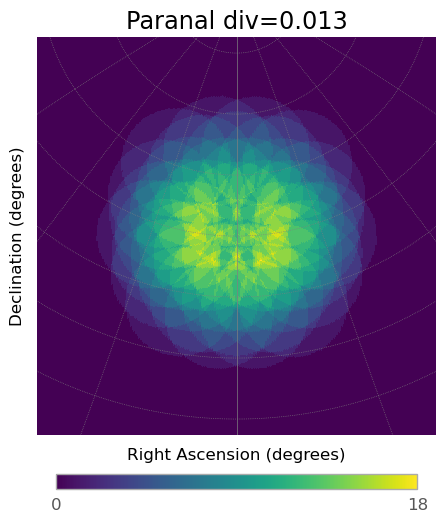

In [73]:
full_array_FoV_cut=[]
full_array_av_m_cut=[]
for divergence in divergence_list:   
    full_array.divergent_pointing(div=divergence, az=0, alt=70)
    full_array_FoV_cut.append(full_array.hFoV(m_cut=3)[0])
    full_array_av_m_cut.append(full_array.hFoV(m_cut=3)[1])
    full_array.multiplicity_plot()

In [74]:
full_array_FoV=[]
full_array_av_m=[]
for divergence in divergence_list:   
    full_array.divergent_pointing(div=divergence, az=0, alt=70)
    full_array_FoV.append(full_array.hFoV()[0])
    full_array_av_m.append(full_array.hFoV()[1])
    #complete_array.multiplicity_plot()

The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:06,  6.61it/s]
46it [00:06,  6.87it/s]


The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:06,  6.92it/s]
46it [00:06,  6.83it/s]


The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:06,  6.68it/s]
46it [00:06,  6.90it/s]


The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:06,  6.88it/s]
46it [00:06,  6.88it/s]


The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:06,  6.76it/s]
46it [00:06,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.221837773865566 rad
-0.0 rad
1.2129291541744542 rad
-0.025178426011643846 rad
1.213048216427508 rad
0.025178426011643846 rad
1.2127806189394152 rad
-0.0 rad
1.2303769438743488 rad
0.026561135767256355 rad
1.2301361746872446 rad
-0.026561135767256355 rad
1.230640506364589 rad
-0.0 rad


6it [00:00,  6.72it/s]
7it [00:01,  6.97it/s]
6it [00:00,  6.45it/s]


10.477672692584962


7it [00:01,  6.68it/s]


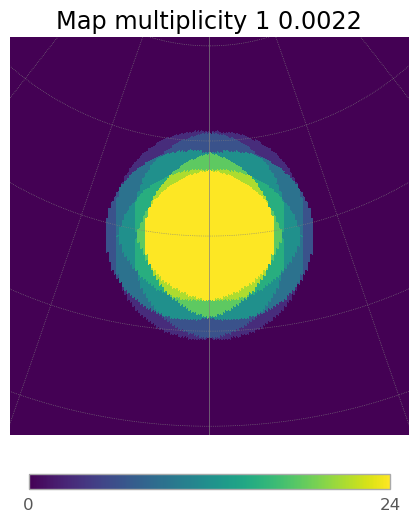

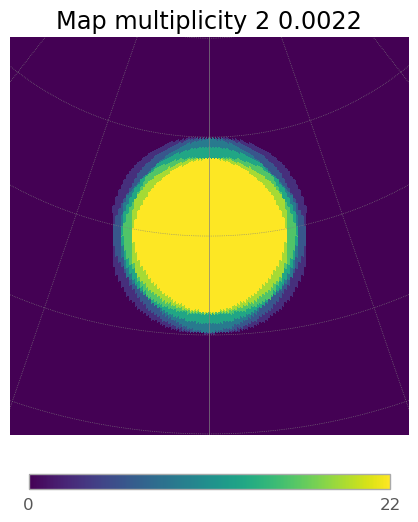

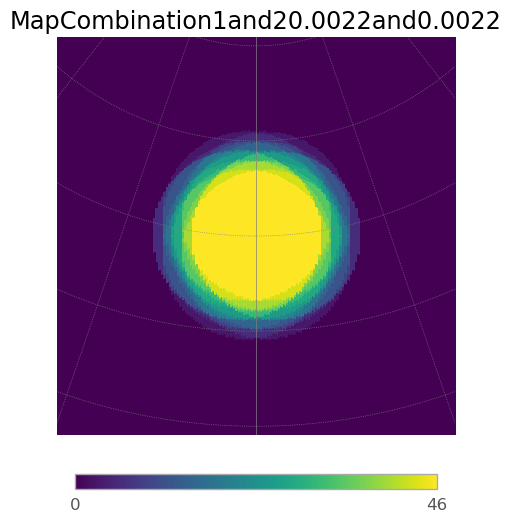

In [38]:
array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=0.0022, div2=0.0022, az=0, alt=70)
array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)



The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:06,  6.85it/s]
46it [00:06,  6.66it/s]


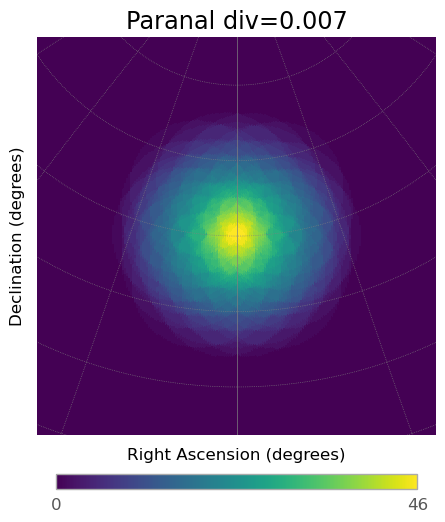

In [39]:
full_array.divergent_pointing(div=0.007, az=0, alt=70)
full_array.multiplicity_plot()

The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:06,  6.63it/s]
46it [00:06,  6.77it/s]


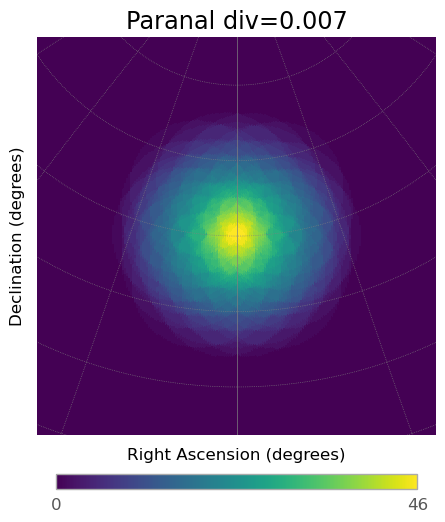

In [40]:
full_array.divergent_pointing(div=0.007, az=0, alt=70)
full_array.multiplicity_plot()

In [41]:
full_array.hFoV()

46it [00:06,  6.70it/s]


(211.48888463000762, 13.524958144726236)

In [42]:
array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)

6it [00:00,  6.44it/s]
7it [00:01,  6.91it/s]


(94.26316752777917, 30.334168057874233)

In [43]:
## here we can play around a bit with the same number as before only that we stop at 0.013
#The idea could be to do an if lets see if I am able to do it 

# CHOOSING THE DIFFERENT CONVERGENCES
## DIV lets try 0.0022, 0.0043, 0.008, 0.01135, 0.013

The barycenter -1.1557142857142904
The barycenter 0.0
The barycenter 24.595714285714287


7it [00:01,  6.70it/s]
7it [00:01,  6.50it/s]


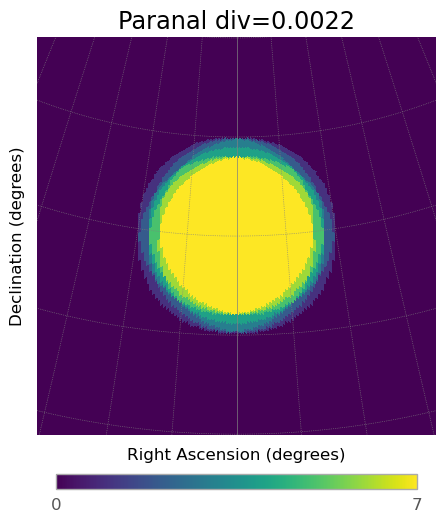

In [44]:
array_div.divergent_pointing(div=0.0022, az=0, alt=60)
array_div.multiplicity_plot()

In [45]:
array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div)

7it [00:01,  6.65it/s]


(80.33613860255637, 17.021384263793667)

In [46]:
hFoV_to_stop=array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div,m_cut=21)[0]

7it [00:01,  6.50it/s]


In [47]:
hFoV_to_stop

45.977555001724234

In [48]:
full_array

In [49]:
conv=np.linspace(-0.0035,-0.0011, 20)
for convergence in conv:
    array_conv.divergent_pointing(complete_array=complete_array,div=convergence, az=0, alt=70)
    hFoV_conv=array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0]
    print(array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0])
    if hFoV_conv > hFoV_to_stop:
        convergence_to_stop=convergence
        print(f"stop, the {convergence}")
        break 

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]
6it [00:00,  6.85it/s]


23.9985526677568
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.55it/s]
6it [00:00,  6.73it/s]


24.955871981825787
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]
6it [00:00,  6.72it/s]


26.20169848643611
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.64it/s]
6it [00:00,  6.61it/s]


27.250815542950072
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.43it/s]
6it [00:00,  6.69it/s]


28.457300157941123
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.78it/s]
6it [00:00,  6.77it/s]


29.6768987361386
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.88it/s]
6it [00:00,  6.91it/s]


30.739129755858983
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:01,  5.94it/s]
6it [00:00,  6.58it/s]


32.11609589253355
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.58it/s]
6it [00:00,  6.91it/s]


33.21766880187321
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.67it/s]
6it [00:00,  6.87it/s]


34.50283719610281
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.94it/s]
6it [00:00,  6.95it/s]


35.77489162712598
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.90it/s]
6it [00:00,  6.89it/s]


37.1780856902134
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.00it/s]
6it [00:00,  6.90it/s]


38.528823900475125
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]
6it [00:00,  7.00it/s]


39.68285266264048
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]
6it [00:00,  6.80it/s]


41.26964221061784
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.81it/s]
6it [00:00,  6.98it/s]


42.56792456805387
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]
6it [00:00,  6.97it/s]


44.089144299999106
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]
6it [00:00,  6.73it/s]


45.38742665743513
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.96it/s]
6it [00:00,  6.97it/s]

46.908646389380365
stop, the -0.0012263157894736839


In [50]:
convergence_to_stop

-0.0012263157894736839

In [51]:
conv=np.linspace(-0.0083,-0.0012, 100)
convergence_list=[]
divergence_list=[0.0022, 0.0043, 0.008, 0.01135, 0.013]
for divergence in divergence_list:
    for convergence in conv:
        array_div.divergent_pointing(complete_array=complete_array,div=divergence, az=0, alt=70)
        hFoV_to_stop=array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div,m_cut=21)[0]
        array_conv.divergent_pointing(complete_array=complete_array, div=convergence, az=0, alt=70)
        hFoV_conv=array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0]
        if hFoV_conv > hFoV_to_stop:
            convergence=round(convergence,5)
            convergence_list.append(convergence)
            print(f"stop, the {convergence}")
            break 

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.80it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.80it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.71it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.65it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.56it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.64it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.80it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.98it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.71it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.76it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:01,  5.40it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.70it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:00,  7.01it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.98it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.00it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.98it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.97it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:00,  7.06it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.03it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.80it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.67it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.72it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.00it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.99it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.58it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.57it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.68it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.68it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.63it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.74it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.71it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.85it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.49it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  5.40it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.66it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.67it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.28it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.60it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.70it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.66it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.80it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  5.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.76it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.97it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.76it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.65it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.55it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.39it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.64it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:00,  7.05it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.59it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.50it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.71it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.64it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.02it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.72it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.71it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.98it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.74it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  7.00it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:01,  5.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.69it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.85it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.74it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.72it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.38it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.50it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.76it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.63it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.74it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.62it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.03it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.59it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.70it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.85it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.90it/s]


stop, the -0.00134
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.69it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.03it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.02it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.98it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.74it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.98it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.47it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.67it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.76it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.72it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.85it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.58it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.53it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.17it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.60it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.37it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.51it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  5.44it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.64it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.02it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.62it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.80it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.70it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.80it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.47it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.01it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.76it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.54it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.71it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.49it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.74it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  7.00it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.74it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.85it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.66it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  5.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.66it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.56it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.25it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.56it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.85it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:00,  7.01it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.69it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.76it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:00,  7.06it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.69it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.66it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:01,  5.58it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.76it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.69it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.57it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:00,  7.04it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.58it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.97it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.24it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.60it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.74it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.85it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.67it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.72it/s]


stop, the -0.00263
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.72it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.85it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.03it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.99it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.84it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  5.97it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.47it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.00it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.62it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.76it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.71it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.85it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:00,  7.02it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.73it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.74it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.97it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.80it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.76it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.25it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:01,  5.71it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.40it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.43it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.39it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.48it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.69it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.43it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.33it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.75it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.25it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.53it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.34it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.52it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.78it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.69it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.56it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.02it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.95it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.40it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.79it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.72it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.83it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.68it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.94it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.00it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.90it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.69it/s]


stop, the -0.005
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  5.03it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  4.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.91it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.96it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:00,  7.04it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.66it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.60it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.89it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.99it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  7.01it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.93it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.81it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.88it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.48it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.57it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.46it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.63it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.86it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.87it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  5.82it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.61it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.91it/s]


stop, the -0.00722
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.92it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.77it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


7it [00:01,  6.68it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847


6it [00:00,  6.70it/s]

stop, the -0.00823


In [52]:
# Here i am not using the one that I normally use for the pointing with the corresponding barycenter because i am trying just to make an estimate

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.221837773865566 rad
-0.0 rad
1.2129291541744542 rad
-0.025178426011643846 rad
1.213048216427508 rad
0.025178426011643846 rad
1.2127806189394152 rad
-0.0 rad
1.2303769438743488 rad
0.026561135767256355 rad
1.2301361746872446 rad
-0.026561135767256355 rad
1.230640506364589 rad
-0.0 rad


6it [00:00,  6.80it/s]
7it [00:01,  6.82it/s]
6it [00:00,  6.50it/s]


10.077450378074385


7it [00:01,  6.92it/s]


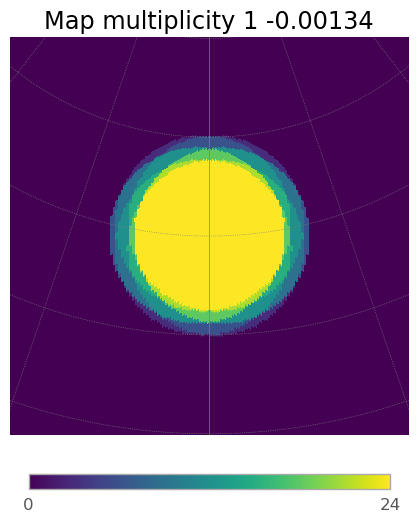

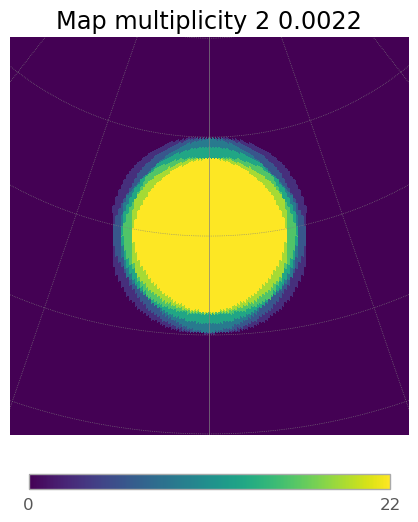

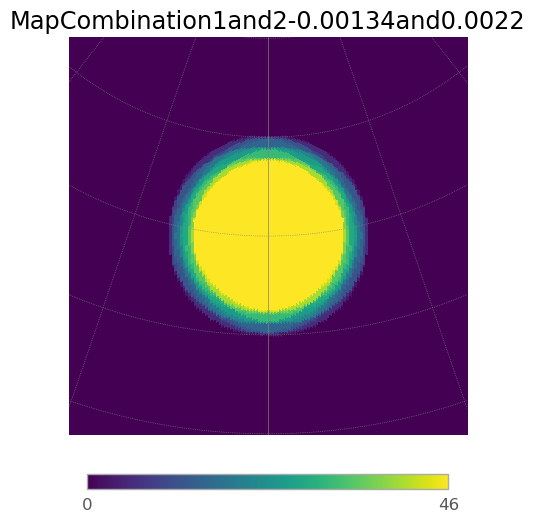

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.2219402277399039 rad
-0.0 rad
1.2043925465804042 rad
-0.0479904988656012 rad
1.2046298056495823 rad
0.0479904988656012 rad
1.2042884867924208 rad
-0.0 rad
1.2384529599364629 rad
0.0532730716377664 rad
1.2379917161768568 rad
-0.0532730716377664 rad
1.2391977379163566 rad
-0.0 rad


6it [00:00,  6.67it/s]
7it [00:01,  6.85it/s]
6it [00:00,  6.53it/s]


10.6793351773081


7it [00:01,  6.73it/s]


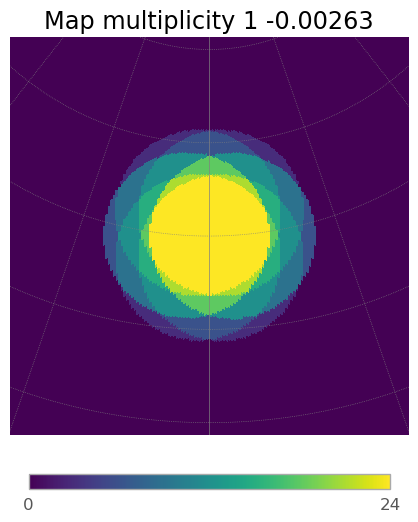

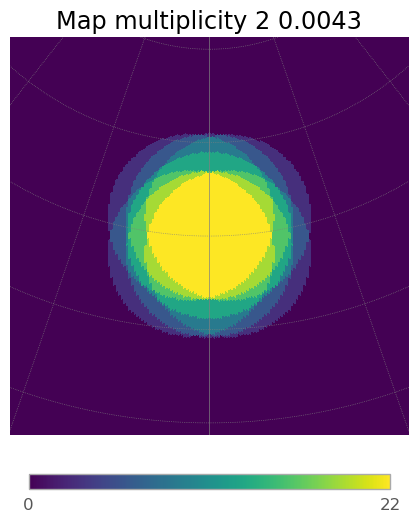

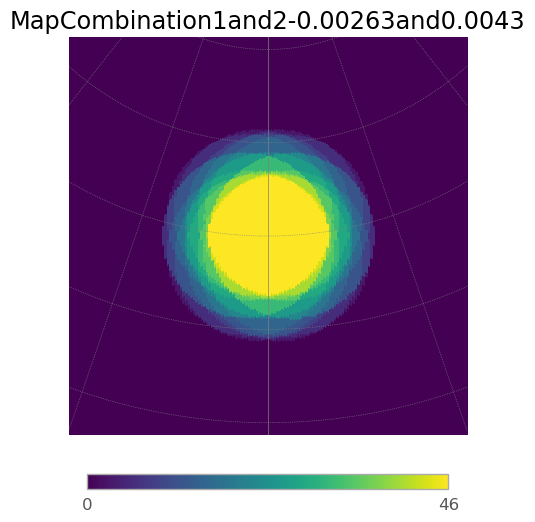

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.222120825704168 rad
-0.0 rad
1.189082111560649 rad
-0.08547884876417715 rad
1.1895383811626927 rad
0.08547884876417715 rad
1.1894492050480268 rad
-0.0 rad
1.2521943898540595 rad
0.10376783219523598 rad
1.2513663579851608 rad
-0.10376783219523598 rad
1.2543966727348794 rad
-0.0 rad


6it [00:00,  6.74it/s]
7it [00:01,  6.96it/s]
6it [00:00,  6.58it/s]


11.754020698401964


7it [00:01,  6.84it/s]


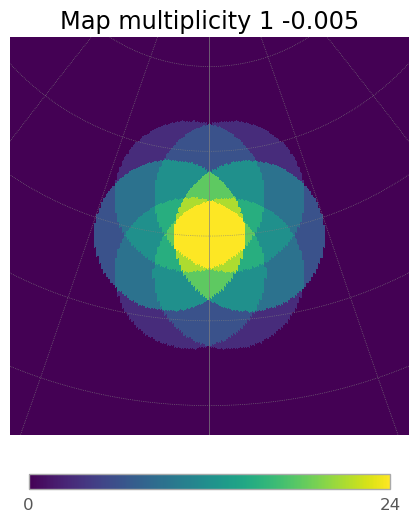

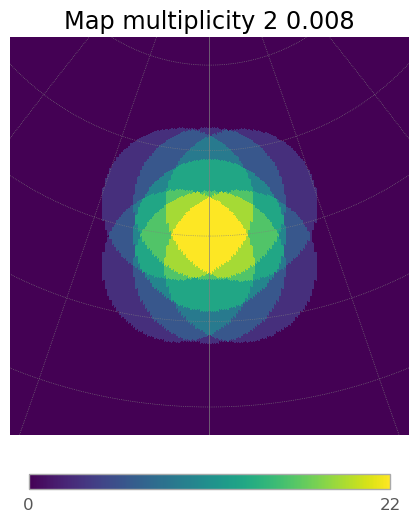

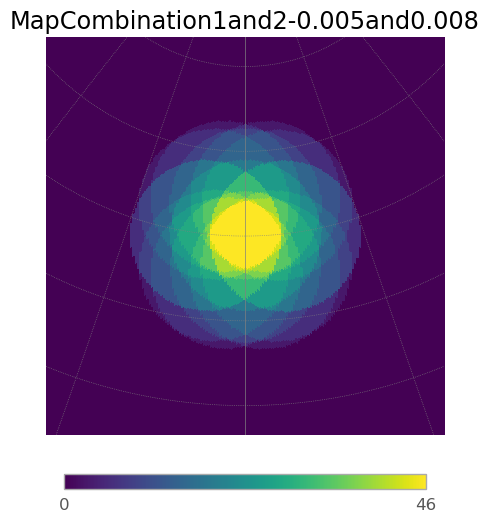

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.2222844378552749 rad
-0.0 rad
1.174982099700631 rad
-0.11668434568238038 rad
1.175648326770499 rad
0.11668434568238038 rad
1.1761514501071109 rad
-0.0 rad
1.2640084898923605 rad
0.15350516525433922 rad
1.2628711151349332 rad
-0.15350516525433922 rad
1.268289130738942 rad
-0.0 rad


6it [00:00,  6.85it/s]
7it [00:01,  6.81it/s]
6it [00:00,  6.38it/s]


12.733925520704616


7it [00:01,  6.84it/s]


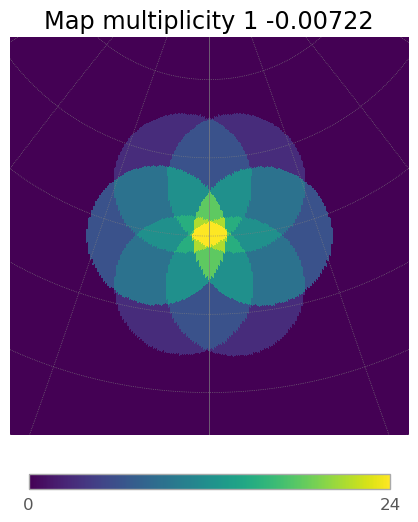

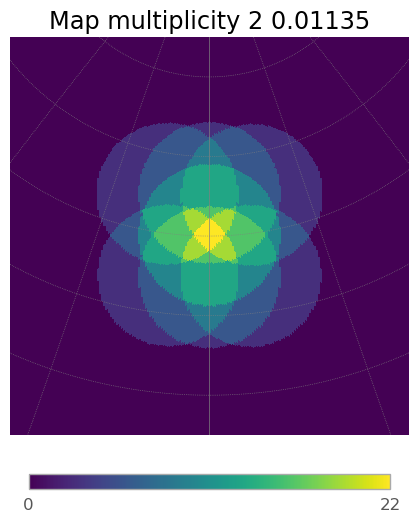

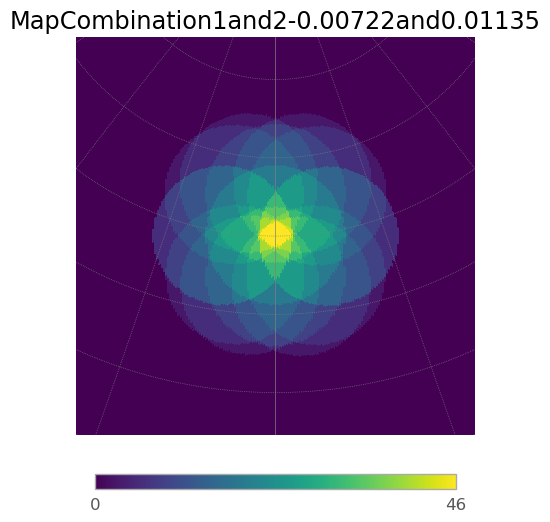

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.2223650588765775 rad
-0.0 rad
1.1679719740259311 rad
-0.1311735431249487 rad
1.1687455961982909 rad
0.1311735431249487 rad
1.169650686662978 rad
-0.0 rad
1.2695757146601427 rad
0.1794797475927617 rad
1.268293421520115 rad
-0.1794797475927617 rad
1.2751765105195842 rad
-0.0 rad


6it [00:00,  6.39it/s]
7it [00:01,  6.18it/s]
6it [00:00,  6.62it/s]


13.169635782884946


7it [00:01,  6.86it/s]


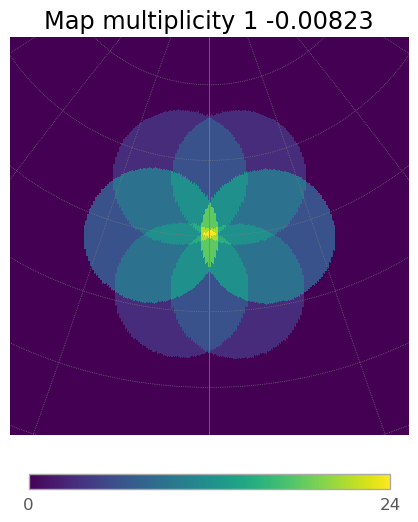

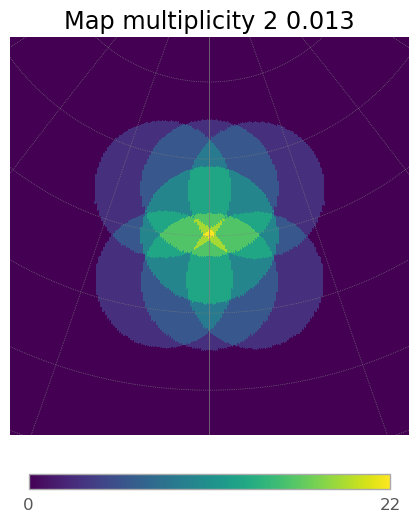

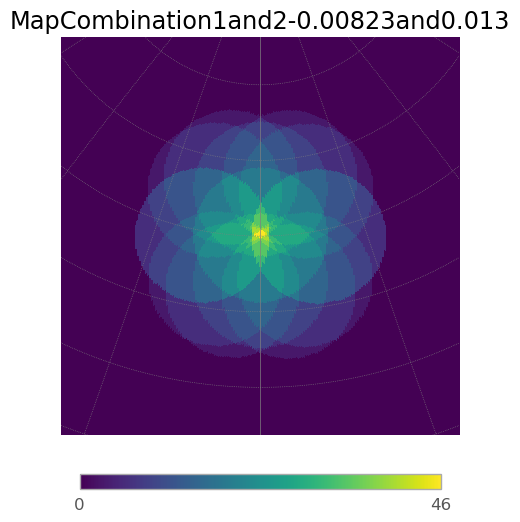

In [53]:
for i in range(5):
    array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=70)
    array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)


In [54]:
# To do the hFoV and the average multiplicity 

In [55]:
array_div.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-7.75,0.0,22.5,-0.000,70.036,19.964,5.600,4.450,62.462,0.341,0.000,0.940,8.77
2,415.67,402.0,12.42,352.484,66.920,23.080,5.600,4.450,62.462,0.389,0.051,0.920,578.95
3,415.67,-402.0,27.92,7.516,66.964,23.036,5.600,4.450,62.462,0.388,-0.051,0.920,578.74
4,429.33,0.0,16.08,-0.000,67.016,22.984,5.600,4.450,62.462,0.390,0.000,0.921,430.16
5,-415.67,-402.0,48.25,10.283,72.741,17.259,5.600,4.450,62.462,0.292,-0.053,0.955,578.14
6,-415.67,402.0,15.58,349.717,72.668,17.332,5.600,4.450,62.462,0.293,0.053,0.955,577.90
7,-429.67,0.0,29.42,-0.000,73.062,16.938,5.600,4.450,62.462,0.291,0.000,0.957,429.00


In [56]:
hFoV_SST=[]
average_multiplicity_SST=[]
for i in range(5):
    array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=70)
    hFoV_SST.append(array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)[0])
    print(array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div))
    average_multiplicity_SST.append(array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)[1])


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.221837773865566 rad
-0.0 rad
1.2129291541744542 rad
-0.025178426011643846 rad
1.213048216427508 rad
0.025178426011643846 rad
1.2127806189394152 rad
-0.0 rad
1.2303769438743488 rad
0.026561135767256355 rad
1.2301361746872446 rad
-0.026561135767256355 rad
1.230640506364589 rad
-0.0 rad


6it [00:00,  6.30it/s]
7it [00:01,  6.81it/s]
6it [00:00,  6.44it/s]
7it [00:01,  6.99it/s]


(81.98849796656586, 34.88083813179782)


6it [00:00,  6.71it/s]
7it [00:01,  6.74it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.2219402277399039 rad
-0.0 rad
1.2043925465804042 rad
-0.0479904988656012 rad
1.2046298056495823 rad
0.0479904988656012 rad
1.2042884867924208 rad
-0.0 rad
1.2384529599364629 rad
0.0532730716377664 rad
1.2379917161768568 rad
-0.0532730716377664 rad
1.2391977379163566 rad
-0.0 rad


6it [00:00,  6.23it/s]
7it [00:01,  6.86it/s]
6it [00:00,  6.58it/s]
7it [00:01,  6.43it/s]


(103.66587914678553, 27.608602150537635)


6it [00:00,  6.17it/s]
7it [00:01,  6.53it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.222120825704168 rad
-0.0 rad
1.189082111560649 rad
-0.08547884876417715 rad
1.1895383811626927 rad
0.08547884876417715 rad
1.1894492050480268 rad
-0.0 rad
1.2521943898540595 rad
0.10376783219523598 rad
1.2513663579851608 rad
-0.10376783219523598 rad
1.2543966727348794 rad
-0.0 rad


6it [00:00,  6.21it/s]
7it [00:01,  6.57it/s]
6it [00:00,  6.26it/s]
7it [00:01,  6.75it/s]


(148.06975856373882, 19.323974847223454)


6it [00:00,  6.18it/s]
7it [00:01,  6.59it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.2222844378552749 rad
-0.0 rad
1.174982099700631 rad
-0.11668434568238038 rad
1.175648326770499 rad
0.11668434568238038 rad
1.1761514501071109 rad
-0.0 rad
1.2640084898923605 rad
0.15350516525433922 rad
1.2628711151349332 rad
-0.15350516525433922 rad
1.268289130738942 rad
-0.0 rad


6it [00:00,  6.26it/s]
7it [00:01,  6.65it/s]
6it [00:01,  5.55it/s]
7it [00:01,  6.27it/s]


(195.48984951816973, 14.631984973502382)


6it [00:00,  6.26it/s]
7it [00:01,  6.55it/s]


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.2223650588765775 rad
-0.0 rad
1.1679719740259311 rad
-0.1311735431249487 rad
1.1687455961982909 rad
0.1311735431249487 rad
1.169650686662978 rad
-0.0 rad
1.2695757146601427 rad
0.1794797475927617 rad
1.268293421520115 rad
-0.1794797475927617 rad
1.2751765105195842 rad
-0.0 rad


6it [00:00,  6.32it/s]
7it [00:01,  6.62it/s]
6it [00:00,  6.08it/s]
7it [00:01,  6.33it/s]


(219.68511163402292, 13.013968481375358)


6it [00:00,  6.31it/s]
7it [00:01,  6.57it/s]


In [57]:
hFoV_SST

[81.98849796656586,
 103.66587914678553,
 148.06975856373882,
 195.48984951816973,
 219.68511163402292]

In [58]:
average_multiplicity_SST

[34.88083813179782,
 27.608602150537635,
 19.323974847223454,
 14.631984973502382,
 13.013968481375358]

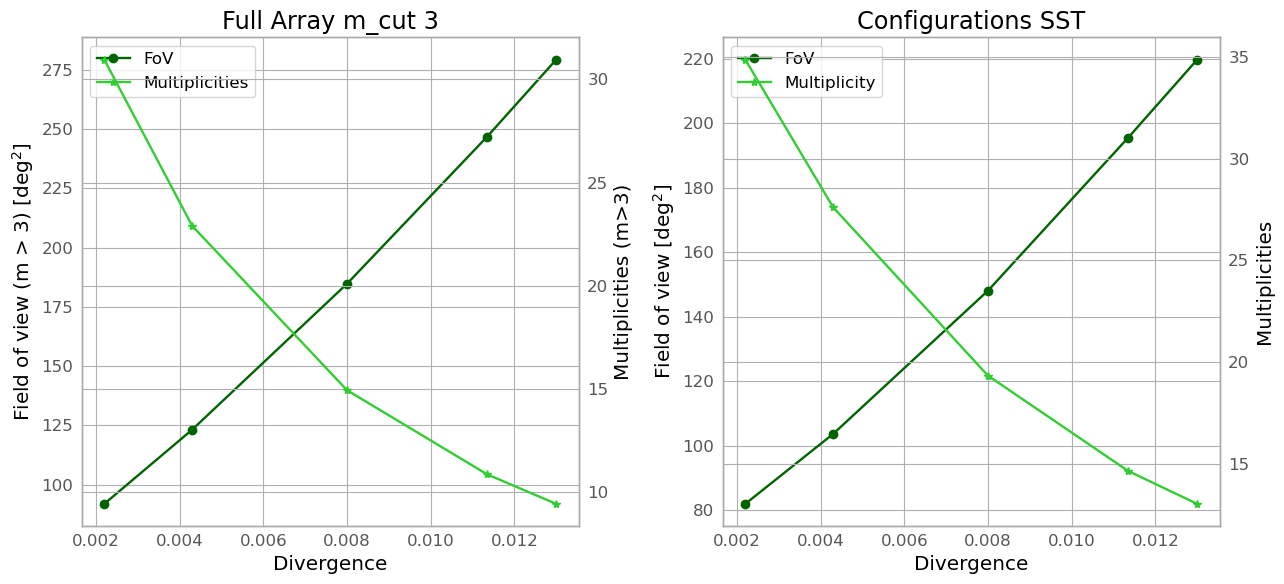

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6)) 
# Plot Full Array
 #Full Array with m_cut = 3
l1=axes[0].plot(divergence_list, full_array_FoV_cut, label='FoV', marker='o', color='darkgreen')
ax2 = axes[0].twinx()
l2=ax2.plot(divergence_list, full_array_av_m_cut, label='Multiplicities',marker='*', color='limegreen')
axes[0].set_title('Full Array m_cut 3')
axes[0].set_xlabel('Divergence')
axes[0].set_ylabel('Field of view (m > 3) [deg$^2$]')
ax2.set_ylabel('Multiplicities (m>3)')
axeslegend = l1+l2
axes[0].legend(axeslegend, [l.get_label() for l in axeslegend])



#Plot the ones for subarray
l1=axes[1].plot(divergence_list,hFoV_SST, label='FoV',marker='o', color='darkgreen')
ax5=axes[1].twinx()
l2=ax5.plot(divergence_list, average_multiplicity_SST, label='Multiplicity', marker='*', color='limegreen')
axes[1].set_title('Configurations SST')
axes[1].set_xlabel('Divergence')
axes[1].set_ylabel('Field of view [deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[1].legend(axeslegend, [l.get_label() for l in axeslegend])
#Plot the ones for subarray 2

# Adjust layout
plt.tight_layout()
# Subarray 4
# Adjust layout
plt.show()

In [60]:
print( full_array_FoV_cut)


[91.91576811382919, 123.21879828756443, 184.77574157852095, 246.85724339773444, 279.36675818646074]


In [61]:
print(full_array_av_m_cut)

[30.96647167926951, 22.907620263942103, 14.939247693399574, 10.858637909052273, 9.428484251044454]


In [62]:
print(full_array_FoV)

[403.60844560412625, 403.60844560412625, 403.60844560412625, 403.60844560412625, 403.60844560412625]


In [63]:
print(full_array_av_m)

[7.087922799493128, 7.087922799493128, 7.087922799493128, 7.087922799493128, 7.087922799493128]


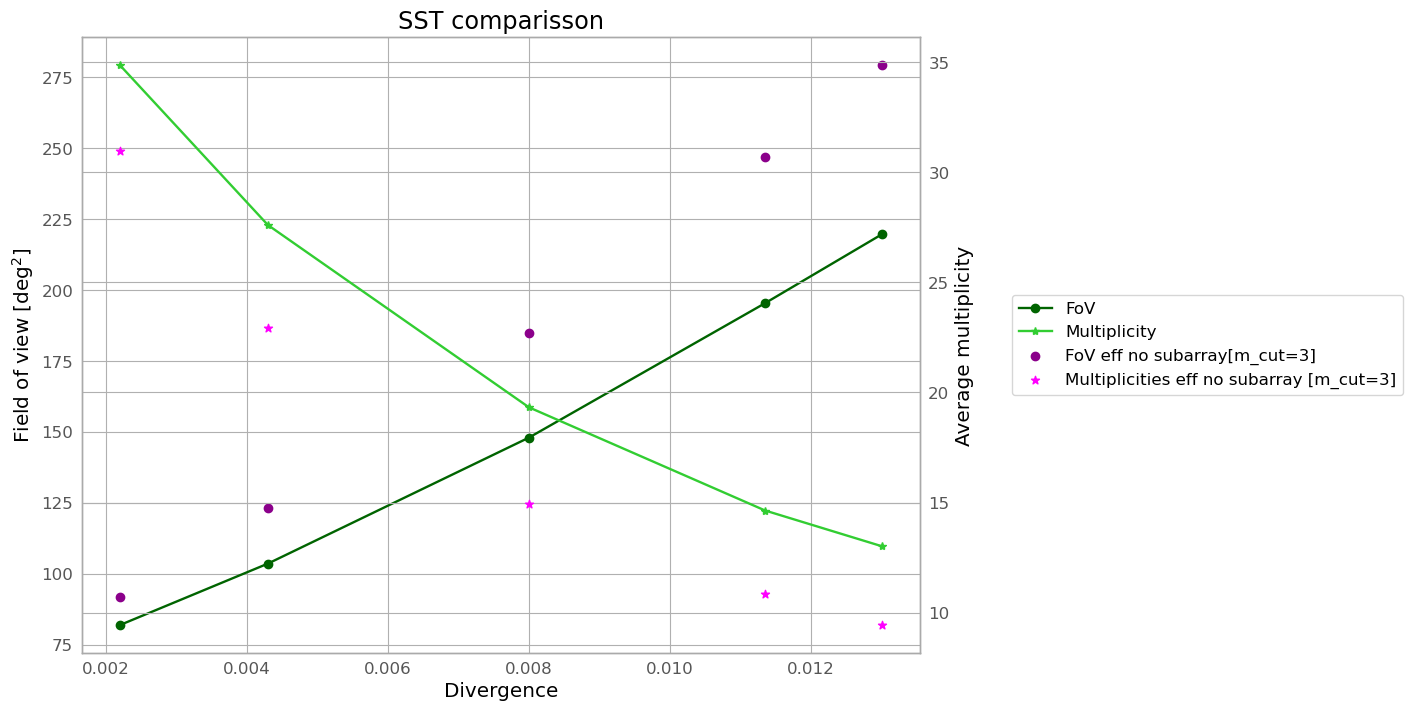

In [75]:
f, ax = plt.subplots(1, 1, figsize=(10,7))
p1 = ax.plot(divergence_list, hFoV_SST, label='FoV',marker='o', color='darkgreen')
p3=plt.scatter(divergence_list, full_array_FoV_cut, label='FoV eff no subarray[m_cut=3]', marker='o', color='darkmagenta')
#p5=plt.scatter(chosen_divergences, FoV_full_array_no_multiplicity_cut, label='FoV no  subarray nor m_cut', marker='o', color='navy')
ax.set_xlabel('Divergence')
ax.set_ylabel('Field of view [deg$^2$]')


ax2 = ax.twinx()
p2 = ax2.plot(divergence_list, average_multiplicity_SST, label='Multiplicity', marker='*', color='limegreen')
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
plt.title("SST comparisson")

p4=plt.scatter(divergence_list, full_array_av_m_cut, label='Multiplicities eff no subarray [m_cut=3]',marker='*', color='magenta')
#p6=plt.scatter(chosen_divergences, multiplicity_full_array_no_multiplicity_cut, label='Multiplicity no  subarray nor m_cut', marker='*', color='royalblue')
ps = p1+p2+[p3]+[p4]
ax.legend(ps, [p.get_label() for p in ps], loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

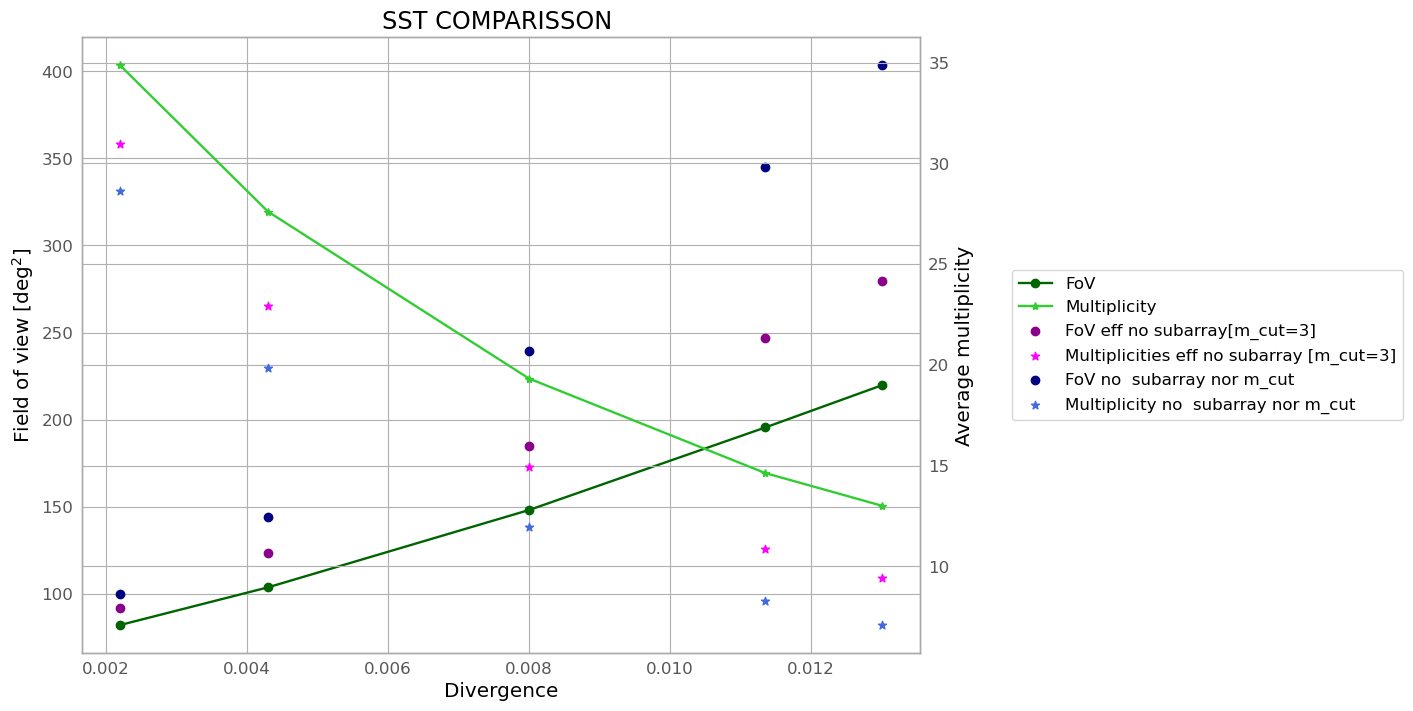

In [76]:
f, ax = plt.subplots(1, 1, figsize=(10,7))
p1 = ax.plot(divergence_list , hFoV_SST, label='FoV',marker='o', color='darkgreen')
p3=plt.scatter(divergence_list, full_array_FoV_cut, label='FoV eff no subarray[m_cut=3]', marker='o', color='darkmagenta')
p5=plt.scatter(divergence_list, full_array_FoV, label='FoV no  subarray nor m_cut', marker='o', color='navy')
ax.set_xlabel('Divergence')
ax.set_ylabel('Field of view [deg$^2$]')


ax2 = ax.twinx()
p2 = ax2.plot(divergence_list, average_multiplicity_SST, label='Multiplicity', marker='*', color='limegreen')
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
plt.title("SST COMPARISSON ")

p4=plt.scatter(divergence_list,  full_array_av_m_cut, label='Multiplicities eff no subarray [m_cut=3]',marker='*', color='magenta')
p6=plt.scatter(divergence_list, full_array_av_m, label='Multiplicity no  subarray nor m_cut', marker='*', color='royalblue')
ps = p1+p2+[p3]+[p4] +[p5]+[p6]
ax.legend(ps, [p.get_label() for p in ps], loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

In [77]:
complete_array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,342.755,69.118,20.882,5.600,4.450,62.462,0.340,0.106,0.934,816.85
2,-840.0,404.67,16.75,347.271,75.723,14.277,5.600,4.450,62.462,0.241,0.054,0.969,931.85
3,-840.0,-404.67,55.92,12.729,75.797,14.203,5.600,4.450,62.462,0.239,-0.054,0.969,932.21
4,0.0,-816.83,65.42,17.245,69.232,20.768,5.600,4.450,62.462,0.339,-0.105,0.935,817.70
5,839.67,-404.67,17.75,6.650,64.166,25.834,5.600,4.450,62.462,0.433,-0.050,0.900,932.76
6,839.67,404.67,10.08,353.350,64.142,25.858,5.600,4.450,62.462,0.433,0.051,0.900,932.87
7,-7.75,0.0,22.5,-0.000,70.036,19.964,5.600,4.450,62.462,0.341,0.000,0.940,8.77
8,415.67,402.0,12.42,352.484,66.920,23.080,5.600,4.450,62.462,0.389,0.051,0.920,578.95


In [78]:
array_div.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-7.75,0.0,22.5,-0.000,70.036,19.964,5.600,4.450,62.462,0.341,0.000,0.940,8.77
2,415.67,402.0,12.42,352.484,66.920,23.080,5.600,4.450,62.462,0.389,0.051,0.920,578.95
3,415.67,-402.0,27.92,7.516,66.964,23.036,5.600,4.450,62.462,0.388,-0.051,0.920,578.74
4,429.33,0.0,16.08,-0.000,67.016,22.984,5.600,4.450,62.462,0.390,0.000,0.921,430.16
5,-415.67,-402.0,48.25,10.283,72.741,17.259,5.600,4.450,62.462,0.292,-0.053,0.955,578.14
6,-415.67,402.0,15.58,349.717,72.668,17.332,5.600,4.450,62.462,0.293,0.053,0.955,577.90
7,-429.67,0.0,29.42,-0.000,73.062,16.938,5.600,4.450,62.462,0.291,0.000,0.957,429.00


In [79]:
array_conv.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,11.122,69.661,20.339,5.600,4.450,62.462,0.341,-0.067,0.938,816.85
2,-840.0,404.67,16.75,4.632,66.323,23.677,5.600,4.450,62.462,0.400,-0.032,0.916,931.85
3,-840.0,-404.67,55.92,355.368,66.250,23.750,5.600,4.450,62.462,0.401,0.033,0.915,932.21
4,0.0,-816.83,65.42,348.878,69.589,20.411,5.600,4.450,62.462,0.342,0.067,0.937,817.70
5,839.67,-404.67,17.75,353.041,73.708,16.292,5.600,4.450,62.462,0.278,0.034,0.960,932.76
6,839.67,404.67,10.08,6.959,73.718,16.282,5.600,4.450,62.462,0.278,-0.034,0.960,932.87


In [69]:
print(type(number_of_telescopes_config_SST_conv))

<class 'list'>


In [70]:
number_of_telescopes_config_SST_conv

[6, 3, 3, 6, 3, 3]

In [155]:
hFoV_graph

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 62.21264145127774]

6it [00:01,  4.70it/s]
7it [00:01,  5.37it/s]
6it [00:01,  5.35it/s]
7it [00:01,  5.40it/s]
6it [00:01,  4.79it/s]
7it [00:01,  4.94it/s]
6it [00:01,  3.20it/s]
7it [00:01,  3.85it/s]
6it [00:01,  4.19it/s]
7it [00:01,  4.19it/s]
6it [00:01,  4.33it/s]
7it [00:01,  4.55it/s]
6it [00:01,  4.83it/s]
7it [00:01,  4.88it/s]
6it [00:01,  4.96it/s]
7it [00:01,  4.84it/s]
6it [00:01,  4.82it/s]
7it [00:01,  4.83it/s]
6it [00:01,  4.63it/s]
7it [00:01,  4.98it/s]
6it [00:01,  4.94it/s]
7it [00:01,  4.96it/s]
6it [00:01,  4.72it/s]
7it [00:01,  4.83it/s]
6it [00:01,  3.90it/s]
7it [00:01,  5.23it/s]
6it [00:01,  4.95it/s]
7it [00:01,  4.88it/s]
6it [00:01,  4.99it/s]
7it [00:01,  5.56it/s]
6it [00:01,  5.75it/s]
7it [00:01,  5.59it/s]
6it [00:01,  5.83it/s]
7it [00:01,  5.75it/s]
6it [00:00,  6.01it/s]
7it [00:01,  6.06it/s]
6it [00:00,  6.13it/s]
7it [00:01,  6.25it/s]
6it [00:00,  6.01it/s]
7it [00:01,  5.67it/s]
6it [00:01,  5.74it/s]
7it [00:01,  5.79it/s]
6it [00:01,  5.86it/s]
7it [00:01,

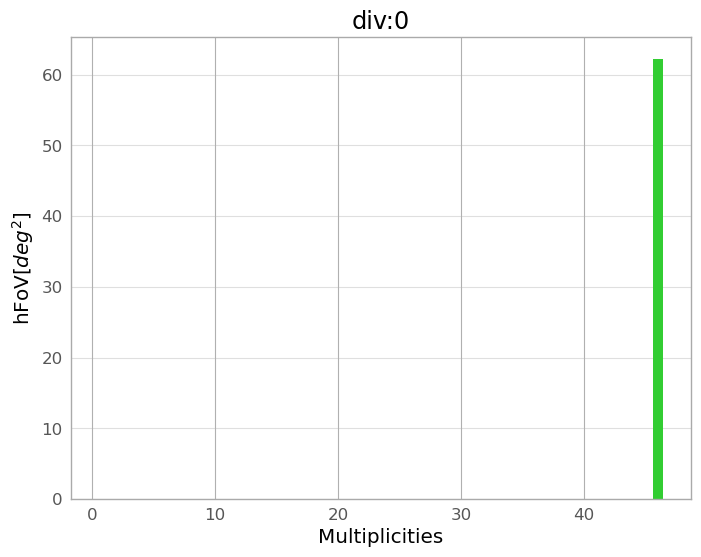

In [154]:
hFoV_graph=[]
multiplicities=[]
array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=0, div2=0, az=0, alt=70)
#full_array.divergent_pointing(div=0.001, az=0, alt=70)
for j in range(46):
        hFoV_graph.append(array_conv.combiantion_of_FoV_with_m_cut_equal_to(number_of_arrays=2, array_2=array_div,subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div, m_cut=j)
[0])
        multiplicities.append(j+1)
plt.figure(figsize=(8, 6)) 
plt.bar(multiplicities, np.array(hFoV_graph).flatten(), color='limegreen')
plt.xlabel("Multiplicities")
plt.ylabel("hFoV[$deg^2$]")
plt.title(f"div:{0}")
plt.grid(axis='y', alpha=0.4)
plt.show()   


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.221837773865566 rad
-0.0 rad
1.2129291541744542 rad
-0.025178426011643846 rad
1.213048216427508 rad
0.025178426011643846 rad
1.2127806189394152 rad
-0.0 rad
1.2303769438743488 rad
0.026561135767256355 rad
1.2301361746872446 rad
-0.026561135767256355 rad
1.230640506364589 rad
-0.0 rad


6it [00:01,  4.58it/s]
7it [00:01,  5.49it/s]
6it [00:01,  4.97it/s]
7it [00:01,  5.47it/s]
6it [00:01,  5.40it/s]
7it [00:01,  5.39it/s]
6it [00:01,  5.27it/s]
7it [00:01,  5.11it/s]
6it [00:01,  5.25it/s]
7it [00:01,  5.46it/s]
6it [00:01,  5.27it/s]
7it [00:01,  5.22it/s]
6it [00:01,  5.12it/s]
7it [00:01,  5.35it/s]
6it [00:01,  5.22it/s]
7it [00:01,  5.43it/s]
6it [00:01,  5.23it/s]
7it [00:01,  5.50it/s]
6it [00:01,  5.24it/s]
7it [00:01,  4.58it/s]
6it [00:01,  4.61it/s]
7it [00:01,  4.48it/s]
6it [00:01,  4.97it/s]
7it [00:01,  4.87it/s]
6it [00:01,  3.03it/s]
7it [00:01,  4.70it/s]
6it [00:01,  4.88it/s]
7it [00:01,  4.99it/s]
6it [00:01,  4.74it/s]
7it [00:01,  4.07it/s]
6it [00:01,  4.67it/s]
7it [00:01,  4.75it/s]
6it [00:01,  4.76it/s]
7it [00:01,  4.53it/s]
6it [00:01,  5.00it/s]
7it [00:01,  5.10it/s]
6it [00:01,  4.35it/s]
7it [00:01,  4.34it/s]
6it [00:01,  4.32it/s]
7it [00:01,  4.62it/s]
6it [00:01,  5.14it/s]
7it [00:01,  4.60it/s]
6it [00:01,  4.70it/s]
7it [00:01,

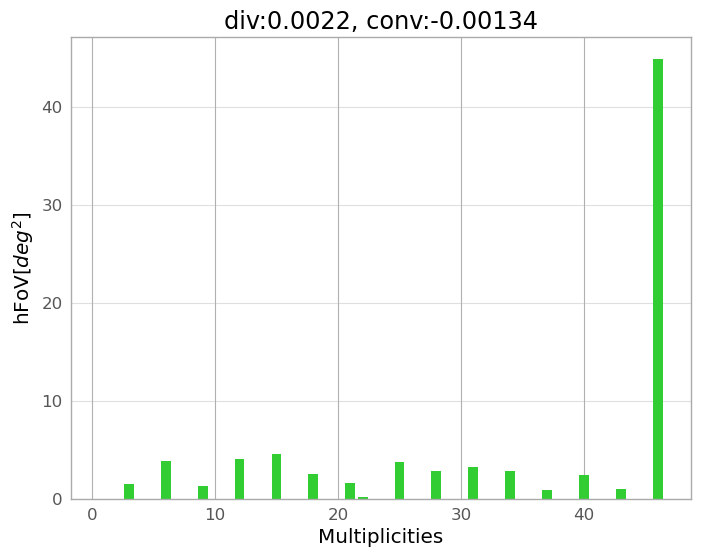

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.221837773865566 rad
-0.0 rad
1.2129291541744542 rad
-0.025178426011643846 rad
1.213048216427508 rad
0.025178426011643846 rad
1.2127806189394152 rad
-0.0 rad
1.2303769438743488 rad
0.026561135767256355 rad
1.2301361746872446 rad
-0.026561135767256355 rad
1.230640506364589 rad
-0.0 rad


6it [00:01,  4.18it/s]
7it [00:01,  3.94it/s]
6it [00:01,  4.29it/s]
7it [00:01,  4.46it/s]
6it [00:01,  4.72it/s]
7it [00:01,  4.82it/s]
6it [00:01,  4.12it/s]
7it [00:02,  2.96it/s]
6it [00:01,  4.46it/s]
7it [00:01,  4.61it/s]
6it [00:01,  4.21it/s]
7it [00:01,  3.86it/s]
6it [00:01,  4.11it/s]
7it [00:01,  4.72it/s]
6it [00:01,  4.88it/s]
7it [00:01,  4.72it/s]
6it [00:01,  4.24it/s]
7it [00:01,  4.53it/s]
6it [00:01,  4.47it/s]
7it [00:01,  4.50it/s]
6it [00:01,  4.55it/s]
7it [00:01,  4.98it/s]
6it [00:01,  4.59it/s]
7it [00:01,  4.99it/s]
6it [00:01,  5.08it/s]
7it [00:01,  5.05it/s]
6it [00:01,  4.64it/s]
7it [00:01,  4.65it/s]
6it [00:01,  4.44it/s]
7it [00:01,  4.74it/s]
6it [00:01,  4.99it/s]
7it [00:01,  4.73it/s]
6it [00:01,  4.72it/s]
7it [00:01,  4.87it/s]
6it [00:01,  4.75it/s]
7it [00:01,  5.01it/s]
6it [00:01,  5.12it/s]
7it [00:01,  4.87it/s]
6it [00:01,  4.78it/s]
7it [00:01,  4.77it/s]
6it [00:01,  4.93it/s]
7it [00:01,  4.74it/s]
6it [00:01,  4.71it/s]
7it [00:01,

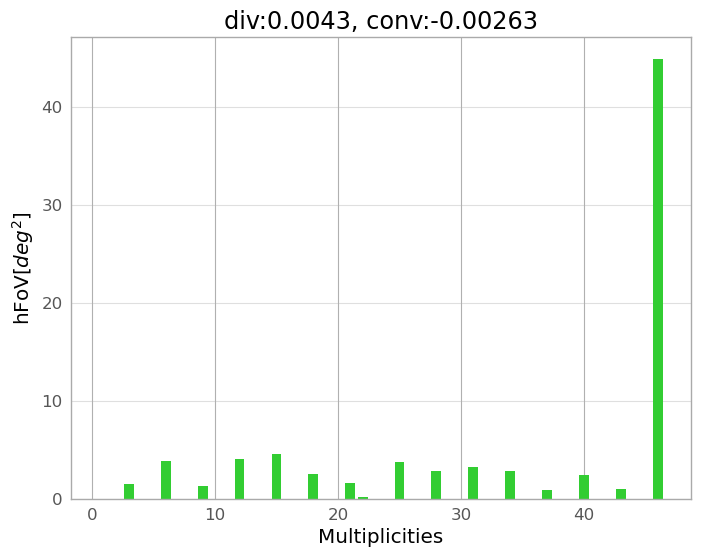

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.221837773865566 rad
-0.0 rad
1.2129291541744542 rad
-0.025178426011643846 rad
1.213048216427508 rad
0.025178426011643846 rad
1.2127806189394152 rad
-0.0 rad
1.2303769438743488 rad
0.026561135767256355 rad
1.2301361746872446 rad
-0.026561135767256355 rad
1.230640506364589 rad
-0.0 rad


6it [00:01,  4.24it/s]
7it [00:01,  4.02it/s]
6it [00:01,  4.41it/s]
7it [00:01,  4.76it/s]
6it [00:01,  4.44it/s]
7it [00:01,  4.92it/s]
6it [00:01,  4.99it/s]
7it [00:01,  4.79it/s]
6it [00:02,  2.99it/s]
7it [00:01,  4.50it/s]
6it [00:01,  4.50it/s]
7it [00:01,  4.86it/s]
6it [00:01,  5.08it/s]
7it [00:01,  4.95it/s]
6it [00:01,  4.90it/s]
7it [00:01,  4.79it/s]
6it [00:01,  4.99it/s]
7it [00:01,  5.32it/s]
6it [00:01,  4.80it/s]
7it [00:01,  4.62it/s]
6it [00:01,  4.43it/s]
7it [00:01,  4.74it/s]
6it [00:01,  4.39it/s]
7it [00:01,  4.98it/s]
6it [00:01,  4.89it/s]
7it [00:01,  4.44it/s]
6it [00:01,  3.91it/s]
7it [00:01,  5.07it/s]
6it [00:01,  4.73it/s]
7it [00:01,  3.87it/s]
6it [00:01,  4.51it/s]
7it [00:02,  2.46it/s]
6it [00:01,  4.48it/s]
7it [00:01,  3.63it/s]
6it [00:01,  3.97it/s]
7it [00:01,  4.60it/s]
6it [00:01,  3.91it/s]
7it [00:01,  4.46it/s]
6it [00:02,  2.42it/s]
7it [00:01,  4.26it/s]
6it [00:01,  4.05it/s]
7it [00:01,  4.41it/s]
6it [00:01,  4.62it/s]
7it [00:01,

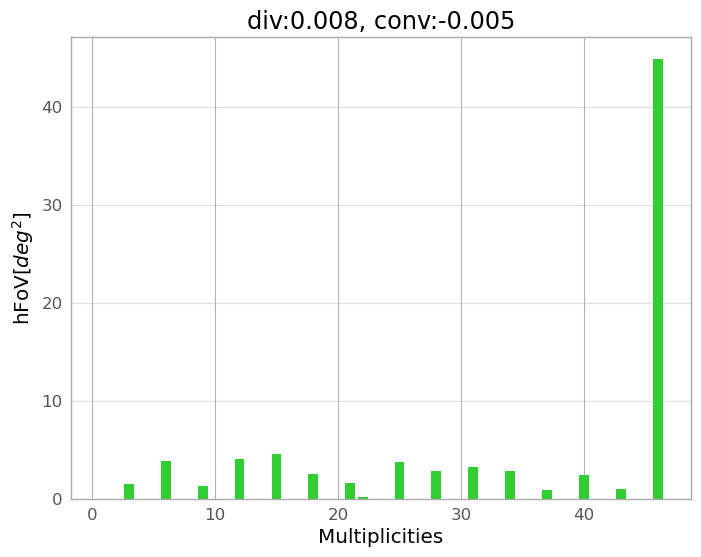

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.221837773865566 rad
-0.0 rad
1.2129291541744542 rad
-0.025178426011643846 rad
1.213048216427508 rad
0.025178426011643846 rad
1.2127806189394152 rad
-0.0 rad
1.2303769438743488 rad
0.026561135767256355 rad
1.2301361746872446 rad
-0.026561135767256355 rad
1.230640506364589 rad
-0.0 rad


6it [00:01,  4.66it/s]
7it [00:01,  4.54it/s]
6it [00:01,  4.41it/s]
7it [00:01,  4.57it/s]
6it [00:01,  4.68it/s]
7it [00:01,  4.89it/s]
6it [00:01,  4.79it/s]
7it [00:01,  4.96it/s]
6it [00:01,  4.52it/s]
7it [00:01,  4.71it/s]
6it [00:01,  4.65it/s]
7it [00:01,  4.84it/s]
6it [00:01,  4.94it/s]
7it [00:01,  5.16it/s]
6it [00:01,  5.02it/s]
7it [00:01,  5.17it/s]
6it [00:01,  4.86it/s]
7it [00:01,  4.86it/s]
6it [00:01,  4.82it/s]
7it [00:02,  3.38it/s]
6it [00:01,  4.36it/s]
7it [00:01,  4.66it/s]
6it [00:01,  4.81it/s]
7it [00:01,  4.37it/s]
6it [00:01,  4.53it/s]
7it [00:01,  4.66it/s]
6it [00:01,  4.70it/s]
7it [00:01,  4.77it/s]
6it [00:01,  4.39it/s]
7it [00:01,  4.36it/s]
6it [00:01,  4.28it/s]
7it [00:01,  4.40it/s]
6it [00:01,  4.39it/s]
7it [00:01,  5.02it/s]
6it [00:01,  4.79it/s]
7it [00:01,  4.66it/s]
6it [00:01,  3.98it/s]
7it [00:01,  4.32it/s]
6it [00:01,  4.13it/s]
7it [00:01,  5.08it/s]
6it [00:01,  4.68it/s]
7it [00:01,  4.82it/s]
6it [00:01,  4.05it/s]
7it [00:01,

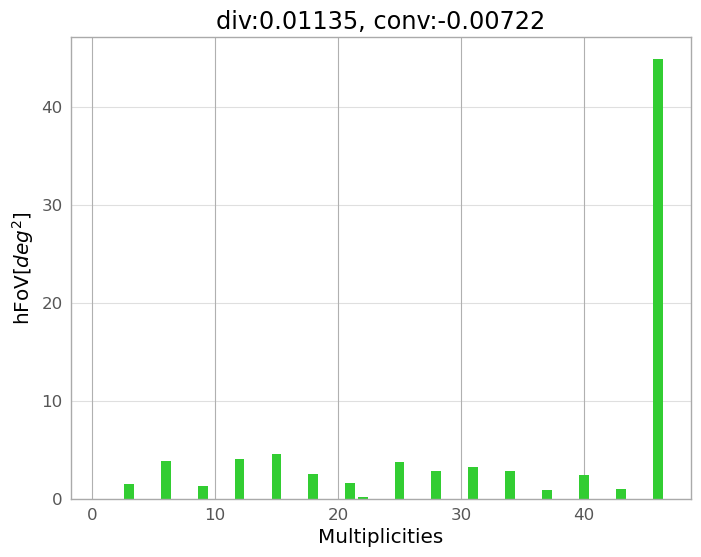

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.221837773865566 rad
-0.0 rad
1.2129291541744542 rad
-0.025178426011643846 rad
1.213048216427508 rad
0.025178426011643846 rad
1.2127806189394152 rad
-0.0 rad
1.2303769438743488 rad
0.026561135767256355 rad
1.2301361746872446 rad
-0.026561135767256355 rad
1.230640506364589 rad
-0.0 rad


6it [00:00,  6.24it/s]
7it [00:01,  6.33it/s]
6it [00:00,  6.14it/s]
7it [00:01,  5.71it/s]
6it [00:00,  6.23it/s]
7it [00:01,  6.28it/s]
6it [00:00,  6.31it/s]
7it [00:01,  5.07it/s]
6it [00:00,  6.44it/s]
7it [00:01,  6.38it/s]
6it [00:00,  6.27it/s]
7it [00:01,  6.44it/s]
6it [00:00,  6.47it/s]
7it [00:01,  6.55it/s]
6it [00:00,  6.22it/s]
7it [00:01,  6.54it/s]
6it [00:00,  6.16it/s]
7it [00:01,  6.65it/s]
6it [00:00,  6.52it/s]
7it [00:01,  6.52it/s]
6it [00:00,  6.48it/s]
7it [00:01,  6.73it/s]
6it [00:00,  6.55it/s]
7it [00:01,  6.56it/s]
6it [00:00,  6.40it/s]
7it [00:01,  6.55it/s]
6it [00:00,  6.48it/s]
7it [00:01,  6.67it/s]
6it [00:00,  6.05it/s]
7it [00:01,  6.26it/s]
6it [00:00,  6.26it/s]
7it [00:01,  6.17it/s]
6it [00:00,  6.19it/s]
7it [00:01,  6.02it/s]
6it [00:01,  5.79it/s]
7it [00:01,  6.46it/s]
6it [00:00,  6.32it/s]
7it [00:01,  6.45it/s]
6it [00:00,  6.23it/s]
7it [00:01,  6.37it/s]
6it [00:01,  5.43it/s]
7it [00:01,  5.63it/s]
6it [00:01,  5.63it/s]
7it [00:01,

KeyboardInterrupt: 

In [157]:
for i in range(5):
    hFoV_graph=[]
    multiplicities=[]
    #config_MST.divergent_pointing(div_MST[i], az=0,alt=70)
    array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=70)
#full_array.divergent_pointing(div=0.001, az=0, alt=70)

    for j in range(46):
        hFoV_graph.append(array_conv.combiantion_of_FoV_with_m_cut_equal_to(number_of_arrays=2, array_2=array_div,subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div, m_cut=j)
[0])
        multiplicities.append(j+1)
    plt.figure(figsize=(8, 6)) 
    plt.bar(multiplicities, np.array(hFoV_graph).flatten(), color='limegreen')
    plt.xlabel("Multiplicities")
    plt.ylabel("hFoV[$deg^2$]")
    plt.title(f"div:{divergence_list[i]}, conv:{convergence_list[i]}")
    plt.grid(axis='y', alpha=0.4)
    plt.show()   



The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.221837773865566 rad
-0.0 rad
1.2129291541744542 rad
-0.025178426011643846 rad
1.213048216427508 rad
0.025178426011643846 rad
1.2127806189394152 rad
-0.0 rad
1.2303769438743488 rad
0.026561135767256355 rad
1.2301361746872446 rad
-0.026561135767256355 rad
1.230640506364589 rad
-0.0 rad
The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:07,  6.38it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


6it [00:00,  6.19it/s]
7it [00:01,  6.47it/s]
6it [00:00,  6.42it/s]
7it [00:01,  6.53it/s]
6it [00:00,  6.52it/s]
7it [00:01,  6.48it/s]
6it [00:00,  6.61it/s]
7it [00:01,  6.30it/s]
6it [00:00,  6.24it/s]
7it [00:01,  6.10it/s]
6it [00:00,  6.35it/s]
7it [00:01,  6.02it/s]
6it [00:01,  5.95it/s]
7it [00:01,  5.52it/s]
6it [00:01,  5.64it/s]
7it [00:01,  5.94it/s]
6it [00:01,  5.66it/s]
7it [00:01,  6.14it/s]
6it [00:00,  6.48it/s]
7it [00:01,  6.55it/s]
6it [00:01,  6.00it/s]
7it [00:01,  6.05it/s]
6it [00:01,  5.83it/s]
7it [00:01,  6.11it/s]
6it [00:01,  5.06it/s]
7it [00:01,  4.91it/s]
6it [00:01,  4.95it/s]
7it [00:02,  3.15it/s]
6it [00:01,  4.59it/s]
7it [00:01,  4.55it/s]
6it [00:01,  4.98it/s]
7it [00:01,  4.96it/s]
6it [00:01,  4.76it/s]
7it [00:01,  4.94it/s]
6it [00:01,  5.14it/s]
7it [00:01,  5.22it/s]
6it [00:01,  5.19it/s]
7it [00:01,  3.74it/s]
6it [00:01,  4.65it/s]
7it [00:01,  4.77it/s]
6it [00:01,  4.67it/s]
7it [00:01,  4.76it/s]
6it [00:01,  5.01it/s]
7it [00:01,

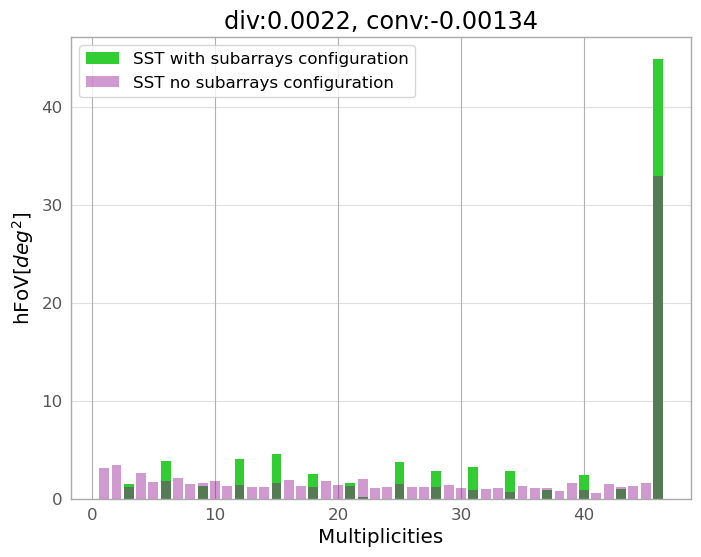

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.2219402277399039 rad
-0.0 rad
1.2043925465804042 rad
-0.0479904988656012 rad
1.2046298056495823 rad
0.0479904988656012 rad
1.2042884867924208 rad
-0.0 rad
1.2384529599364629 rad
0.0532730716377664 rad
1.2379917161768568 rad
-0.0532730716377664 rad
1.2391977379163566 rad
-0.0 rad
The barycenter -0.7391304347826086
The barycenter 0.0
The barycenter 29.652173913043477


46it [00:09,  4.63it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


6it [00:01,  4.70it/s]
7it [00:01,  4.81it/s]
6it [00:01,  4.52it/s]
7it [00:01,  4.80it/s]
6it [00:01,  3.33it/s]
7it [00:01,  4.59it/s]
6it [00:01,  4.77it/s]
7it [00:01,  4.95it/s]
6it [00:01,  3.98it/s]
7it [00:01,  4.96it/s]
6it [00:01,  4.59it/s]
7it [00:01,  4.89it/s]
2it [00:00,  4.79it/s]

In [ ]:
for i in range(5):
    hFoV_graph=[]
    multiplicities=[]
    hFoV_graph_full_array=[]
    #config_MST.divergent_pointing(div_MST[i], az=0,alt=70)
    array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=70)
    full_array.divergent_pointing(div=divergence_list[i], az=0, alt=70)
    hFoV_graph_full_array.append(full_array.hFoV_bar_graph(multiplicity_max=46)[0])
    for j in range(46):
        hFoV_graph.append(array_conv.combiantion_of_FoV_with_m_cut_equal_to(number_of_arrays=2, array_2=array_div,subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div, m_cut=j)
[0])
        multiplicities.append(j+1)
    plt.figure(figsize=(8, 6)) 
    plt.bar(multiplicities, np.array(hFoV_graph).flatten(), color='limegreen', label='SST with subarrays configuration')
    plt.bar(multiplicities, np.array(hFoV_graph_full_array[0]).flatten(), color='darkmagenta',alpha=0.4,label='SST no subarrays configuration')
    plt.xlabel("Multiplicities")
    plt.ylabel("hFoV[$deg^2$]")
    plt.legend()
    plt.title(f"div:{divergence_list[i]}, conv:{convergence_list[i]}")
    plt.grid(axis='y', alpha=0.4)
    plt.show()   


In [161]:
hFoV_graph_full_array=[]
hFoV_graph_full_array.append(full_array.hFoV_bar_graph(multiplicity_max=46)[0])

46it [00:06,  6.72it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


In [162]:
hFoV_graph_full_array

[[1.2458265046103256,
  1.337624247055297,
  0.6294702339083751,
  1.1540287621653542,
  0.5245585282569792,
  0.8130657187983178,
  0.8130657187983178,
  0.5639004178762527,
  0.6163562707019506,
  0.8786355348304402,
  0.49833060184413025,
  0.6556981603212241,
  0.7737238291790444,
  0.4327607858120079,
  0.6688121235276485,
  0.5376724914634037,
  0.8655215716240158,
  0.5901283442891017,
  0.5507864546698282,
  0.8655215716240158,
  0.4589887122248568,
  0.5245585282569792,
  0.8917494980368648,
  0.708154013146922,
  0.6032423074955261,
  0.5639004178762527,
  0.5770143810826771,
  0.7474959027661954,
  0.6688121235276485,
  0.6688121235276485,
  0.36719096977988547,
  0.354077006573461,
  0.6032423074955261,
  0.38030493298630996,
  0.5770143810826771,
  0.8524076084175912,
  0.4721026754312813,
  0.23605133771564066,
  1.1146868725460808,
  0.4721026754312813,
  0.4852166386377058,
  0.8786355348304402,
  0.5114445650505548,
  0.7868377923854688,
  0.8917494980368648,
  47.8921